In [10]:
import torch

In [11]:
torch.__version__

'1.8.1+cpu'

## 2.1 Создание нейронов и полносвязных слоев

2.1.1. Используя операции над матрицами и векторами из библиотеки `torch`, реализовать нейрон с заданными весами `weights` и `bias`. Прогнать вектор `inputs` через нейрон и вывести результат. 

In [12]:
class Neuron:
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias
  
    def forward(self, inputs):
        return inputs @ self.weights + self.bias

In [13]:
inputs = torch.tensor([1.0, 2.0, 3.0, 4.0])
weights = torch.tensor([-0.2, 0.3, -0.5, 0.7])
bias = 3.14

In [14]:
n = Neuron(weights, bias)
n.forward(inputs)

tensor(4.8400)

2.1.2 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать полносвязный слой с заданными весами `weights` и `biases`. Прогнать вектор `inputs` через слой и вывести результат. 

In [15]:
class Linear:
    def __init__(self, weights, biases):
        self.weights = weights
        self.biases = biases
        
  
    def forward(self, inputs):
        return torch.matmul(inputs, self.weights) + self.biases

In [16]:
inputs = torch.tensor([1.0, 2.0, 3.0, 4.0])
weights = torch.tensor([[-0.2, 0.3, -0.5, 0.7],
                        [0.5, -0.91, 0.26, -0.5],
                        [-0.26, -0.27, 0.17, 0.87]]).T

biases = torch.tensor([3.14, 2.71, 7.2])

In [17]:
linear = Linear(weights, biases)
linear.forward(inputs)

tensor([ 4.8400,  0.1700, 10.3900])

2.1.3 Реализовать полносвязный слой из __2.1.2__ таким образом, чтобы он мог принимать на вход матрицу (батч) с данными. Продемонстрировать работу.
Результатом прогона сквозь слой должна быть матрица размера `batch_size` x `n_neurons`.


In [32]:
inputs = torch.tensor([[1, 2, 3, 2.5], 
                       [2, 5, -1, 2], 
                       [-1.5, 2.7, 3.3, -0.8]])

In [33]:
class Linear:
    def __init__(self, weights, biases):
        self.weights = weights
        self.biases = biases
        
  
    def forward(self, inputs):
        return torch.matmul(inputs, self.weights) + self.biases

In [34]:
linear = Linear(weights, biases)

In [35]:
linear.forward(inputs)

tensor([[ 3.7900,  0.9200,  9.0850],
        [ 6.1400, -2.1000,  6.9000],
        [ 2.0400,  0.7610,  6.7260]])

2.1.4 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать полносвязный слой из `n_neurons` нейронов с `n_features` весами у каждого нейрона (инициализируются из стандартного нормального распределения). Прогнать вектор `inputs` через слой и вывести результат. Результатом прогона сквозь слой должна быть матрица размера `batch_size` x `n_neurons`.

In [36]:
class Linear:
    def __init__(self, n_features, n_neurons):
    # <создать атрибуты объекта weights и biases>
        self.weights = torch.randn(n_features, n_neurons)
        self.biases = torch.randn(n_neurons)
        
        
  
    def forward(self, inputs):
        return inputs @ self.weights + self.biases # <реализовать логику слоя>

In [44]:
linear = Linear(4, 5)
linear.forward(inputs)

tensor([[-3.2161,  2.3278,  1.8541, -3.5596,  2.1133],
        [-0.6905,  6.5369, -1.8593,  1.8942, 10.1693],
        [-4.5613,  2.3703,  1.8280,  2.1748,  0.0151]])

2.1.5 Используя решение из __2.1.4__, создать 2 полносвязных слоя и пропустить матрицу `inputs` последовательно через эти два слоя. Количество нейронов в первом слое выбрать произвольно, количество нейронов во втором слое выбрать так, чтобы результатом прогона являлась матрица (3x7). 

In [52]:
inputs = torch.tensor([[1, 2, 3, 2.5], 
                       [2, 5, -1, 2], 
                       [-1.5, 2.7, 3.3, -0.8]])

In [65]:
linear_1 = Linear(4, 6)
linear_2 = Linear(6, 7)
linear_2.forward(linear_1.forward(inputs))

tensor([[  6.6735, -15.2159, -29.8899, -20.2692,  -7.1432,  -8.6822, -13.0969],
        [  4.4222, -14.0789, -27.7349, -13.2002,  -4.1608, -12.5913, -13.2708],
        [  7.8967, -12.6192, -19.2000, -25.7941,  -1.8924,   3.4789,  -6.4616]])

## 2.2 Создание функций активации

2.2.1 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать функцию активации ReLU:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/f4353f4e3e484130504049599d2e7b040793e1eb)

Создать матрицу размера (4,3), заполненную числами из стандартного нормального распределения, и проверить работоспособность функции активации.

In [88]:
class ReLU:
    def forward(self, inputs):
    # <реализовать логику ReLU>
        return torch.where(inputs >= 0, inputs, torch.zeros(inputs.size()))

In [89]:
inputs = torch.randn(4, 3)
inputs

tensor([[-0.0569, -0.3100, -0.6025],
        [ 1.5093,  1.5052,  0.6164],
        [-0.6756, -0.2793,  1.9852],
        [-0.3565,  0.2572, -1.3072]])

In [90]:
relu_func = ReLU()
relu_func.forward(inputs)

tensor([[0.0000, 0.0000, 0.0000],
        [1.5093, 1.5052, 0.6164],
        [0.0000, 0.0000, 1.9852],
        [0.0000, 0.2572, 0.0000]])

2.2.2 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать функцию активации softmax:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/6d7500d980c313da83e4117da701bf7c8f1982f5)

Создать матрицу размера (4,3), заполненную числами из стандартного нормального распределения, и проверить работоспособность функции активации. Строки матрицы трактовать как выходы линейного слоя некоторого классификатора для 4 различных примеров.

In [101]:
class Softmax:
    def forward(self, inputs):
    # <реализовать логику Softmax>
        return torch.exp(inputs) / torch.exp(inputs).sum(axis=1).reshape(-1, 1)

In [102]:
softmax = Softmax()
softmax.forward(inputs)

tensor([[0.4245, 0.3296, 0.2460],
        [0.4157, 0.4140, 0.1702],
        [0.0595, 0.0885, 0.8519],
        [0.3092, 0.5712, 0.1195]])

2.2.3 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать функцию активации ELU:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/eb23becd37c3602c4838e53f532163279192e4fd)

Создать матрицу размера (4,3), заполненную числами из стандартного нормального распределения, и проверить работоспособность функции активации.

In [109]:
class ELU:
    def __init__(self, alpha):
    # <создать атрибут объекта alpha>
        self.alpha = alpha

    def forward(self, inputs):
    # <реализовать логику ReLU>
        m = self.alpha * (torch.exp(inputs) - 1)
        return torch.where(inputs >= 0, inputs, m)     

In [113]:
elu = ELU(0.05)
elu.forward(inputs)

tensor([[-0.0028, -0.0133, -0.0226],
        [ 1.5093,  1.5052,  0.6164],
        [-0.0246, -0.0122,  1.9852],
        [-0.0150,  0.2572, -0.0365]])

## 2.3 Создание функции потерь

2.3.1 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать функцию потерь MSE:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/e258221518869aa1c6561bb75b99476c4734108e)

Создать полносвязный слой с 1 нейроном, прогнать через него батч `inputs` и посчитать значение MSE, трактуя вектор `y` как вектор правильных ответов.

In [114]:
class MSELoss:
    def forward(self, y_pred, y_true):
        return torch.mean((y_pred - y_true) ** 2) # <реализовать логику MSE>

In [115]:
inputs = torch.tensor([[1, 2, 3, 2.5], 
                       [2, 5, -1, 2], 
                       [-1.5, 2.7, 3.3, -0.8]])

y = torch.tensor([2, 3, 4])

In [122]:
linear = Linear(4, 1)
y_pred = linear.forward(inputs)
loss = MSELoss()
loss.forward(y, y_pred)

tensor(8.2028)

2.3.2 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать функцию потерь Categorical Cross-Entropy:

<img src="https://i.ibb.co/93gy1dN/Screenshot-9.png" width="200">

Создать полносвязный слой с 3 нейронами и прогнать через него батч `inputs`. Полученный результат пропустить через функцию активации softmax. Посчитать значение CCE, трактуя вектор `y` как вектор правильных ответов.

In [147]:
class CategoricalCrossentropyLoss:
    def forward(self, y_pred, y_true):
    # <реализовать логику CCE>
        y_pred = y_pred[range(y_pred.size()[1]), y_true]
        return - torch.log(y_pred).sum()

In [148]:
inputs = torch.tensor([[1, 2, 3, 2.5], 
                        [2, 5, -1, 2], 
                        [-1.5, 2.7, 3.3, -0.8]])
y = torch.tensor([1, 0, 0])

In [166]:
softmax = Softmax()
linear = Linear(4, 3)

y_pred = softmax.forward(linear.forward(inputs))

loss = CategoricalCrossentropyLoss()
loss.forward(y_pred, y)

tensor(14.0588)

In [168]:
y_pred

tensor([[1.3132e-04, 3.6688e-01, 6.3299e-01],
        [4.8823e-02, 2.9196e-01, 6.5922e-01],
        [4.3773e-05, 8.5955e-01, 1.4041e-01]])

2.3.3 Модифицировать 2.3.1, добавив L2-регуляризацию.

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/d92ca2429275bfdc0474523babbafe014ca8b580)


In [171]:
class MSELossL2:
    def __init__(self, lambda_):
    # <создать атрибут объекта alpha>
        self.lambda_ = lambda_

    def data_loss(self, y_pred, y_true):
    # <подсчет первого слагаемого из формулы>
        return torch.mean((y_pred - y_true) ** 2)

    def reg_loss(self, layer):
    # используйте атрибуты объекта layer, в которых хранятся веса слоя
    # <подсчет второго слагаемого из формулы>
        return self.lambda_ * ((layer.weights ** 2).sum() + (layer.biases ** 2).sum())
        

    def forward(self, y_pred, y_true, layer):
        return self.data_loss(y_pred, y_true) + self.reg_loss(layer)

## 2.4 Обратное распространение ошибки

2.4.1 Используя один нейрон и SGD (1 пример за шаг), решите задачу регрессии

In [176]:
from sklearn.datasets import make_regression

X, y, coef = make_regression(n_features=4, n_informative=4, coef=True, bias=0.5)
X = torch.tensor(X).float() # <преобразуйте массивы numpy в тензоры torch с типом torch.float32
y = torch.tensor(y).float() # <преобразуйте массивы numpy в тензоры torch с типом torch.float32

[Граф вычислений для этой задачи](https://i.ibb.co/2dhDxZx/photo-2021-02-15-17-18-04.jpg)

2.4.1.1 Реализуйте класс `SquaredLoss`


In [180]:
class SquaredLoss:
    def forward(self, y_pred, y_true):
        return torch.mean((y_pred - y_true) ** 2)

    def backward(self, y_pred, y_true):
        self.dinput = 2 * (y_pred - y_true) # df/dc


2.4.1.2. Модифицируйте класс `Neuron` из __2.1.1__:

  1) Сделайте так, чтобы веса нейрона инициализировались из стандартного нормального распределения

  2) Реализуйте расчет градиента относительно весов `weights` и `bias`

In [190]:
class Neuron:
    def __init__(self, n_inputs):
    # <создать атрибуты объекта weights и bias>
        self.weights = torch.randn(n_inputs, 1)
        self.bias = torch.randn(1)
  
    def forward(self, inputs):
        return inputs @ self.weights + self.bias # <реализовать логику нейрона>
  
    def backward(self, dvalue):
    # dvalue - значение производной, которое приходит нейрону от следующего слоя сети
    # в данном случае это будет значение df/dc (созданное методом backwards у объекта MSELoss)
        self.dweights = dvalue # df/dW
        self.dinput =  dvalue * self.weights # df/wX
        self.dbias = dvalue # df/db


2.4.1.3 Допишите цикл для настройки весов нейрона

[SGD](https://ru.wikipedia.org/wiki/%D0%A1%D1%82%D0%BE%D1%85%D0%B0%D1%81%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D0%B9_%D0%B3%D1%80%D0%B0%D0%B4%D0%B8%D0%B5%D0%BD%D1%82%D0%BD%D1%8B%D0%B9_%D1%81%D0%BF%D1%83%D1%81%D0%BA)

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/dda3670f8a8996a0d3bf80856bb4a166cc8db6d4)

In [191]:
n_inputs = X.shape[1] # <размерность элемента выборки >
learning_rate = 0.1 #  скорость обучения
n_epoch = 100 #  количество эпох

neuron = Neuron(n_inputs)
loss = SquaredLoss()

losses = []
for epoch in range(100):
    for x_example, y_example in zip(X, y):
        # forward pass
        y_pred = neuron.forward(x_example) # <прогон через нейрон>
        curr_loss = loss.forward(y_pred, y_example) # <прогон через функцию потерь>
        losses.append(curr_loss)

        # backprop
        # <вызов методов backward>
        # обратите внимание на последовательность вызовов: от конца к началу
        loss.backward(y_pred, y_example)
        neuron.backward(loss.dinput)

        # <шаг оптимизации для весов (weights и bias) нейрона>
        neuron.weights -= learning_rate * neuron.dweights * x_example.reshape(-1, 1)
        neuron.bias -= learning_rate * neuron.dbias

2.4.2 Решите задачу 2.4.1, используя пакетный градиентный спуск

Вычисления для этой задачи: 
[1](https://i.ibb.co/rmtQT6P/photo-2021-02-15-18-00-43.jpg)
[2](https://i.ibb.co/NmCFVnQ/photo-2021-02-15-18-01-17.jpg)

2.4.1.1 Модифицируйте класс `MSELoss` из __2.3.1__, реализовав расчет производной относительно предыдущего слоя с учетом того, что теперь работа ведется с батчами, а не с индивидуальными примерами
 

In [204]:
class MSELoss:
    def forward(self, y_pred, y_true):
        return torch.mean((y_pred - y_true) ** 2) # <реализовать логику MSE>

    def backward(self, y_pred, y_true):
        self.dinput = - 2 / y_pred.shape[0] * (y_true - y_pred).reshape(-1, 1) # df/dy^


2.4.2.2. Модифицируйте класс `Neuron` из __2.4.1.2__:

  1) Реализуйте метод `forward` таким образом, чтобы он мог принимать на вход матрицу (батч) с данными. 

  2) Реализуйте расчет градиента относительно весов `weights` и `bias` с учетом того, что теперь работа ведется с батчами, а не с индивидуальными примерами

In [205]:
class Neuron:
    def __init__(self, n_inputs):
        # <создать атрибуты объекта weights и bias>
        self.weights = torch.randn(n_inputs, 1)
        self.bias = torch.randn(1)

    def forward(self, inputs):
        return inputs @ self.weights + self.bias # <реализовать логику нейрона>

    def backward(self, dvalue: torch.Tensor):
        # dvalue - значение градиента, которое приходит нейрону от следующего слоя сети
        # в данном случае это будет градиент L по y^ (созданный методом backwards у объекта MSELoss)
        self.dweights = dvalue # df/dW
        self.dbias = dvalue.sum(axis=0) # df/db


2.4.2.3 Допишите цикл для настройки весов нейрона

In [225]:
n_inputs = X.shape[1] # <размерность элемента выборки >
learning_rate = 0.1  #  скорость обучения
n_epoch = 100  #  количество эпох

neuron = Neuron(n_inputs)
loss = MSELoss()

for epoch in range(100):
    # forward pass
    y_pred = neuron.forward(X)  # <прогон через нейрон>
    curr_loss = loss.forward(y_pred.flatten(), y.flatten()) # <прогон через функцию потерь>
    losses.append(curr_loss)

    # backprop
    # <вызов методов backward>
    # обратите внимание на последовательность вызовов: от конца к началу
    loss.backward(y_pred.flatten(), y.flatten())
    neuron.backward(loss.dinput)

    # <шаг оптимизации для весов (weights и bias) нейрона>
    neuron.weights -= learning_rate * (X.T @ neuron.dweights)
    neuron.bias -= learning_rate * neuron.dbias

2.4.3  Используя один полносвязный слой и  пакетный градиетный спуск, решите задачу регрессии из __2.4.1__

2.4.3.1 Модифицируйте класс `Linear` из __2.1.4__. ([вычисление градиентов](https://i.ibb.co/kgVR6m6/photo-2021-02-15-21-30-28.jpg))

In [226]:
class Linear:
    def __init__(self, n_features, n_neurons):
        # <создать атрибуты объекта weights и biases>
        self.weights = torch.randn(n_features, n_neurons)
        self.biases = torch.randn(n_neurons)

    def forward(self, inputs):
        self.inputs = inputs
        return inputs @ self.weights + self.biases # <реализовать логику слоя>

    def backward(self, dvalues):
        self.dweights = self.inputs.T @ dvalues # df/dW
        self.dbiases = dvalues.sum(axis=0) # df/db
        self.dinputs = dvalues @ self.weights.T # df/dX

2.4.3.2 Создайте слой с одним нейроном. Используя класс MSELoss из 2.4.2, убедитесь, что модель обучается

In [228]:
n_inputs = X.shape[1] # <размерность элемента выборки >
learning_rate = 0.1  #  скорость обучения
n_epoch = 100  #  количество эпох

neuron = Linear(n_inputs, 1)
loss = MSELoss()

for epoch in range(100):
    # forward pass
    y_pred = neuron.forward(X)  # <прогон через нейрон>
    curr_loss = loss.forward(y_pred.flatten(), y.flatten()) # <прогон через функцию потерь>
    losses.append(curr_loss)

    # backprop
    # <вызов методов backward>
    # обратите внимание на последовательность вызовов: от конца к началу
    loss.backward(y_pred.flatten(), y.flatten())
    neuron.backward(loss.dinput)

    # <шаг оптимизации для весов (weights и bias) нейрона>
    neuron.weights -= learning_rate * neuron.dweights
    neuron.biases -= learning_rate * neuron.dbiases


In [229]:
losses

[tensor(4410.6958),
 tensor(1112.8158),
 tensor(32.4626),
 tensor(964.6490),
 tensor(69.1670),
 tensor(8172.1851),
 tensor(3169.2385),
 tensor(1405.8409),
 tensor(214.0610),
 tensor(2.4420),
 tensor(1142.1522),
 tensor(64.0040),
 tensor(23.3728),
 tensor(17.5239),
 tensor(1540.3134),
 tensor(15.0900),
 tensor(678.4977),
 tensor(468.4083),
 tensor(14.6846),
 tensor(687.8504),
 tensor(160.1971),
 tensor(621.9562),
 tensor(5.2460),
 tensor(723.3969),
 tensor(6.0456),
 tensor(182.3979),
 tensor(198.8844),
 tensor(1.6545),
 tensor(528.3586),
 tensor(117.9837),
 tensor(0.0001),
 tensor(442.0663),
 tensor(2.3886),
 tensor(90.5303),
 tensor(14.3466),
 tensor(0.2990),
 tensor(1.6385),
 tensor(47.9434),
 tensor(5.6029),
 tensor(65.5643),
 tensor(0.1514),
 tensor(3.7279),
 tensor(68.4772),
 tensor(0.0592),
 tensor(20.8294),
 tensor(15.7685),
 tensor(13.0904),
 tensor(10.3994),
 tensor(2.7695),
 tensor(17.1165),
 tensor(0.3085),
 tensor(0.7305),
 tensor(0.6116),
 tensor(0.5805),
 tensor(0.0862),
 

2.4.4 Используя наработки из 2.4, создайте нейросеть и решите задачу регрессии.

Предлагаемая архитектура: 
1. Полносвязный слой с 10 нейронами
2. Активация ReLU
3. Полносвязный слой с 1 нейроном

In [243]:
X = torch.linspace(-1, 1, 100).view(-1, 1)
y = X.pow(2) + 0.2 * torch.rand(X.size()) 

In [244]:
class Activation_ReLU:
    def forward(self, inputs):
        self.inputs = inputs
        self.output = inputs.clip(min=0)
        return self.output

    def backward(self, dvalues):
        self.dinputs = dvalues.clone()
        self.dinputs[self.inputs <= 0] = 0

In [247]:
# создание компонентов сети
# fc1 =
# relu1 =
# fc2 =
fc1 = Linear(1, 10)
relu1 = Activation_ReLU()
fc2 = Linear(10, 1)

loss = MSELoss()
lr = 0.2

ys = []
for epoch in range(2001):
    # <forward pass>
    # fc1 > relu1 > fc2 > loss
    out = fc2.forward(relu1.forward(fc1.forward(X)))
    data_loss = loss.forward(out, y) # <прогон через функцию потерь>

    if epoch % 200 == 0:
        print(f'epoch {epoch} mean loss {data_loss}')
        ys.append(out)

    # <backprop>
    # loss > fc2 > relu1 > fc1
    loss.backward(out, y)
    fc2.backward(loss.dinput)
    relu1.backward(fc2.dinputs)
    fc1.backward(relu1.dinputs)

    # <шаг оптимизации для fc1>
    fc1.weights -= lr * fc1.dweights
    fc1.biases -= lr * fc1.dbiases
    # <шаг оптимизации для fc2>
    fc2.weights -= lr * fc2.dweights
    fc2.biases -= lr * fc2.dbiases

epoch 0 mean loss 1.9460928440093994
epoch 200 mean loss 0.005146082025021315
epoch 400 mean loss 0.003985214047133923
epoch 600 mean loss 0.0033625236246734858
epoch 800 mean loss 0.00299749244004488
epoch 1000 mean loss 0.0028571730945259333
epoch 1200 mean loss 0.0028132169973105192
epoch 1400 mean loss 0.0027824616990983486
epoch 1600 mean loss 0.0027531427331268787
epoch 1800 mean loss 0.00273717287927866
epoch 2000 mean loss 0.002726712031289935


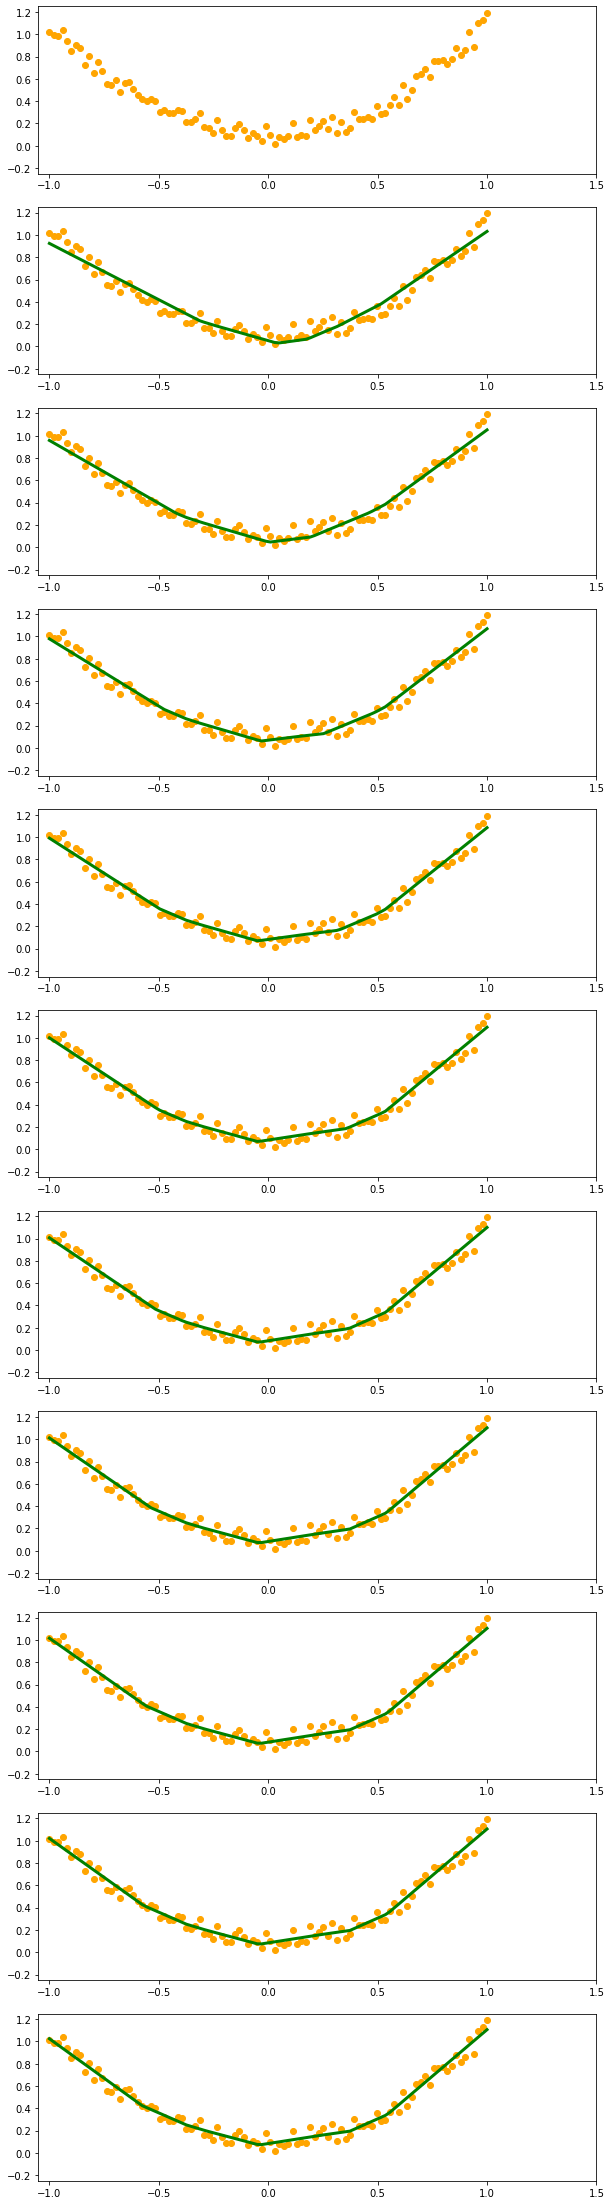

In [248]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(len(ys), 1, figsize=(10, 40))
for ax, y_ in zip(axs, ys):
    ax.scatter(X.numpy(), y.numpy(), color = "orange")
    ax.plot(X.numpy(), y_.numpy(), 'g-', lw=3)
    ax.set_xlim(-1.05, 1.5)
    ax.set_ylim(-0.25, 1.25)